In [2]:
import thresholders
import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
scores_train = pd.read_csv('genesis_qboard_scores_train.csv', index_col=0)['Scores_Train'].values
scores_test = pd.read_csv('genesis_qboard_scores_test.csv', index_col=0)['Scores_Test'].values
labels = pd.read_csv('genesis_qboard_scores_test.csv', index_col=0)['labels'].values
def eval_thresholds(scores, thresholdings_methods):
    thresholds = np.array([thresh_method.fit(scores).thresh_ for thresh_method in thresholdings_methods])
    return thresholds

/home/rdion/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/rdion/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


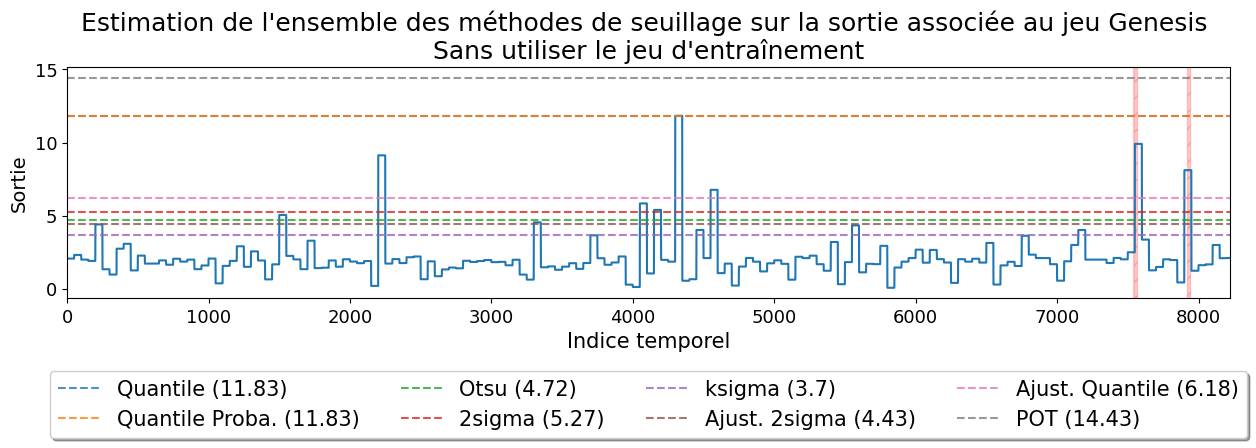

In [4]:
thresholds_only_test = eval_thresholds(scores_test, 
                             [thresholders.Quantile_Thresholder(), thresholders.Probabilistic_Quantile_Thresholder(),
                              thresholders.Otsu_Thresholder(), thresholders.TwoSigma_Thresholder(), thresholders.KSigma_Thresholder(),
                              thresholders.FittedDistribution_TwoSigma_Thresholder(), thresholders.FittedDistribution_Quantile_Thresholder(),
                              thresholders.POT_Thresholder()])

threshold_method_names = ['Quantile', 'Quantile Proba.', 'Otsu', '2sigma','ksigma', 'Ajust. 2sigma', 'Ajust. Quantile', 'POT']

plt.figure(figsize=(15,3))
plt.plot(scores_test)
regions = utils.get_events(labels)[1]
for i_r,region in enumerate(regions):
    if not i_r:
        plt.axvspan(region[0], region[1], color='red', alpha=0.2, hatch='//')
    else:
        plt.axvspan(region[0], region[1], color='red', alpha=0.2, hatch='//')
plt.xlim([0, len(scores_test)])

for i_thresh, threshold in enumerate(thresholds_only_test):
    plt.axhline(threshold, alpha=0.8, linestyle='--', label=f'{threshold_method_names[i_thresh]} ({round(threshold, 2)})', color=f'C{i_thresh}')

plt.legend(loc='upper left', fontsize=14)
plt.ylabel('Sortie', fontsize=14)
plt.xlabel('Indice temporel', fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=13)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.65), ncol=4, fancybox=True, shadow=True, fontsize=15)
plt.title("Estimation de l'ensemble des méthodes de seuillage sur la sortie associée au jeu Genesis \n" +
           "Sans utiliser le jeu d'entraînement", fontsize=18)
plt.show()

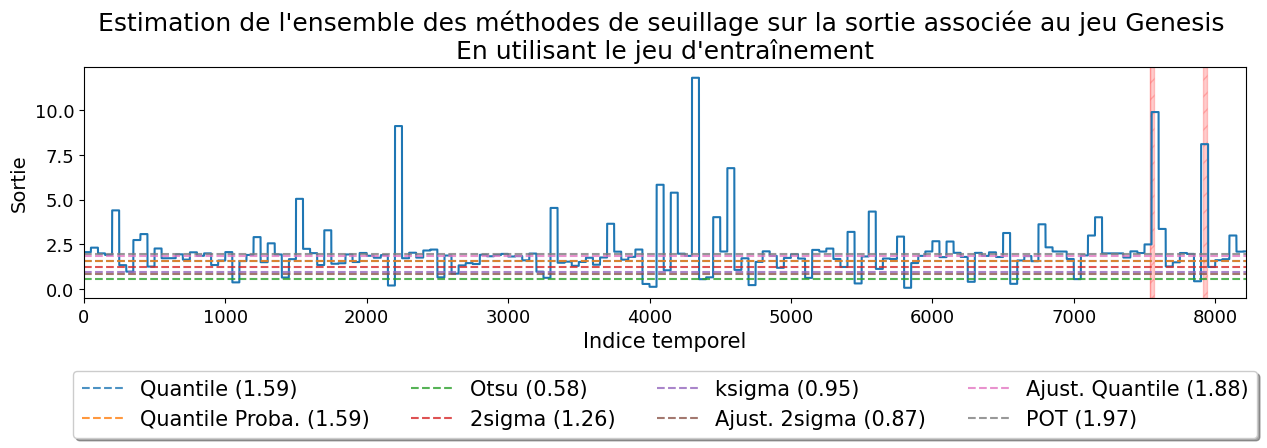

In [5]:
thresholds_blind = eval_thresholds(scores_train, 
                             [thresholders.Quantile_Thresholder(), thresholders.Probabilistic_Quantile_Thresholder(),
                              thresholders.Otsu_Thresholder(), thresholders.TwoSigma_Thresholder(), thresholders.KSigma_Thresholder(),
                              thresholders.FittedDistribution_TwoSigma_Thresholder(), thresholders.FittedDistribution_Quantile_Thresholder(),
                              thresholders.POT_Thresholder()])

threshold_method_names = ['Quantile', 'Quantile Proba.', 'Otsu', '2sigma','ksigma', 'Ajust. 2sigma', 'Ajust. Quantile', 'POT']

plt.figure(figsize=(15,3))
plt.plot(scores_test)
regions = utils.get_events(labels)[1]
for i_r,region in enumerate(regions):
    if not i_r:
        plt.axvspan(region[0], region[1], color='red', alpha=0.2, hatch='//')
    else:
        plt.axvspan(region[0], region[1], color='red', alpha=0.2, hatch='//')
plt.xlim([0, len(scores_test)])

for i_thresh, threshold in enumerate(thresholds_blind):
    plt.axhline(threshold, alpha=0.8, linestyle='--', label=f'{threshold_method_names[i_thresh]} ({round(threshold, 2)})', color=f'C{i_thresh}')

plt.legend(loc='upper left', fontsize=14)
plt.ylabel('Sortie', fontsize=14)
plt.xlabel('Indice temporel', fontsize=15)
plt.tick_params(axis='both', which='both', labelsize=13)
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.65), ncol=4, fancybox=True, shadow=True, fontsize=15)
plt.title("Estimation de l'ensemble des méthodes de seuillage sur la sortie associée au jeu Genesis \n" +
           "En utilisant le jeu d'entraînement", fontsize=18)
plt.show()

In [6]:
"""
The QBoard output on the Lorenz Attractor & ETC datasets are available on Google Drive, at :
Lorenz Attractor : https://drive.google.com/file/d/1aD5RPfjdcMEkdbFaEjJQpDUqdanoksrA/view?usp=sharing
ETC : https://drive.google.com/file/d/1lyhbmqLnwW_zenCG0M8ReyKEKLJAhiN8/view?usp=sharing

Files "lorenz_allmethods_relative_f1score.csv" and "etc_allmethods_absolute_f1score.csv" contain the results of the evaluation.
"""

'\nThe QBoard output on the Lorenz Attractor & ETC datasets are available on Google Drive, at :\nLorenz Attractor : https://drive.google.com/file/d/1aD5RPfjdcMEkdbFaEjJQpDUqdanoksrA/view?usp=sharing\nETC : https://drive.google.com/file/d/1lyhbmqLnwW_zenCG0M8ReyKEKLJAhiN8/view?usp=sharing\n\nFiles "lorenz_allmethods_relative_f1score.csv" and "etc_allmethods_absolute_f1score.csv" contain the results of the evaluation.\n'